# Estudo do conjunto demografico do Titanic 

## Sobre o conjunto de dados utilizado

O conjunto de dados tratado neste relatório foi obtido da plataforma **Kaglle**. O Kanglle é uma plataforma de Hackathon ou Desafios de Machine Learning.

Os dados a serem observados dizem respeito aos passageiros do famoso transatlantico TITANIC pertecente a Companhia maritima RMS

### Dicionario de dados

 <table style="width:90%">
  <tr>
    <th>Column</th>
    <th>Type</th>
    <th>Descrição</th>
  </tr>
  <tr>
    <td>PassengerId</td>
    <td>Numeric</td>
    <td>type should be integers</td>
  </tr>
  <tr>
    <td>Survived</td>
    <td>Numeric</td>
    <td>Survived or Not</td>
  </tr>
  <tr>
    <td>Pclass</td>
    <td>Numeric</td>
    <td>Class of Travel</td>
  </tr>
  <tr>
    <td>Name</td>
    <td>String</td>
    <td>Name of Passenger</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>String</td>
    <td>Gender</td>
  </tr>
  <tr>
    <td>Age</td>
    <td>Numeric</td>
    <td></td>
  </tr>
  <tr>
    <td>SibSp</td>
    <td>String</td>
    <td>Number of Sibling/Spouse aboard</td>
  </tr>
  <tr>
    <td>Parch</td>
    <td>Numeric</td>
    <td>Number of Parent/Child aboard</td>
  </tr>
  <tr>
    <td>Ticket</td>
    <td>String</td>
    <td></td>
  </tr>
  <tr>
    <td>Fare</td>
    <td>Numeric</td>
    <td></td>
  </tr>
  <tr>
    <td>Cabin</td>
    <td>String</td>
    <td></td>
  </tr>
  <tr>
    <td>Embarked</td>
    <td>String</td>
    <td>The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown</td>
  </tr>
</table> 


## O problema (pergunta a ser respondida)


### Diante do conjunto de dados demograficos do Titanic podemos traçar um perfil de evacuação adotado?

### Perguntas?

- Passageiros do sexo feminino possuem maior propensão a serem salvos?
- Pessoas idosas estão menos propensas a serem salvas?
- Passageiros com maior número de familiares são mais propensos a serem salvos?

### Variaveis Idependentes:
- Sex;
- Grupo etário;
- Family size.

### Variavel dependente:
- Survived

## Descrição do processo de investigação

### Limpeza e preparação dos dados

In [1]:
#importando biblioteca pamdas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

% matplotlib inline

#carregando dataset
df = pd.read_csv('titanic-data-6.csv')

**Visão geral dos dados**

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Número de amostras e colunas do conjunto de dados**

In [3]:
print("O DataFrame possui {0} linha e {1} colunas.".format(df.shape[0], df.shape[1]))

O DataFrame possui 891 linha e 12 colunas.


**Presença de linhas duplicadas no conjunto de dados**

In [4]:
#Existencia de linhas duplicadas
print("O conjunto de dados possui {} linhas duplicadas".format(df.duplicated().sum()))

O conjunto de dados possui 0 linhas duplicadas


**Tipos de dados das colunas**

In [5]:
#tipos de dados das colunas
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Observando o tipo de dados das colunas *object*

In [6]:
for i, tipo in enumerate(df.dtypes):
     if tipo == 'object':
        print(df.columns[i], type(df.columns[i][0]))

Name <class 'str'>
Sex <class 'str'>
Ticket <class 'str'>
Cabin <class 'str'>
Embarked <class 'str'>


**Atributos com valor ausente**

In [7]:
msg = ""
vlr = []
for i, coluna in enumerate(df.columns):
    if df[df.columns[i]].isnull().sum() != 0:
        msg += df.columns[i]
        msg += ", "
        vlr.append(df[df.columns[i]].isnull().sum())
if vlr == "":
    print("Não há colunas com valores nulos no DataFrame examinado!")
else:
    print("As coluna(s): {} possuem respectivamente {} valores nulos!".format(msg, vlr))


As coluna(s): Age, Cabin, Embarked,  possuem respectivamente [177, 687, 2] valores nulos!


Apesar da coluna **Age** ser uma de nossas variaveis independentes e possuir valores Nulos. A sua representatividade ainda é superior a 80% do total de dados.

**Valores unicos não nulos**

In [8]:
#retorna o número de valores unicos de cada coluna
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**Apresentando a densidade média do conjunto de dados**

In [9]:
#retorna estatistica descritica de cada coluna
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observação**<br>
1. No momento a densidade média apresentada não é significativa. Faz-se necessário realizar alguns tratamentos de dados faltantes e não númerico das nossas variaveis independentes consideradas, criar colunas de variavel independente não existente no conjunto de dados original;
2. Utilizaremos [feature engineering](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/) apresentado no Kaggle para criar novas caracteristicas para analise dos dados.

**Criando novas Features**<br>
Criaremos as Features 'Title', 'Deck' e 'Family_Size'<br>
- A *Fueature* 'Family_Size' é uma de nossas variaveis independentes de analise obtido da relação das features 'SibSp' (irmãos/cônjuges a bordo do Titanic) e 'Parch' (pais/filhos a bordo do Titanic);
- A *Fueature* 'Title' extraido da feature 'Name' e realizado algumas conversões pelos tratamentos comuns a epoca;
- A *Feature* 'Deck' extraido da feature 'Cabin'

In [10]:
import string


#convertendo os dados object para string
df['Cabin'] = df['Cabin'].astype('str')
df['Name'] = df['Name'].astype('str')
df['Sex'] = df['Sex'].astype('str')
df['Ticket'] = df['Ticket'].astype('str')
df['Embarked'] = df['Embarked'].astype('str')

def substrings_in_string(big_string, substrings):
    '''Função para retornar uma substring de uma string'''
    
    for substring in substrings:
        if big_string.find(substring) != -1:
            return substring
    return np.nan

title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                    'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                    'Don', 'Jonkheer']

#Criando a feature 'Title' extraindo da feature 'Name'
df['Title']=df['Name'].map(lambda x: substrings_in_string(x, title_list))
 
def replace_titles(x):
    '''Função para substituição dos titulos ou tratamentos aos nomes'''
    
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title


df['Title']=df.apply(replace_titles, axis=1)

#Criando a feature 'Deck' extraindo da feature 'Cabin'
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']
df['Deck']=df['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

#criando a feature 'Family_Size' pela adição das features 'SibSp' + 'Parch'
df['Family_Size']=df['SibSp']+df['Parch']


<p>Para a criação da feature Class_Age sera adotado a classificação da WHO (World Health Organization)<br>

In [11]:
def grupo_etario(idade):
    '''Função para retornar o grupo etario a que pertence uma idade'''
    
    if idade > 0.0 and idade <= 9.0:
        return 'child'
    elif idade > 9.0 and idade <= 19.0:
        return 'teenager'
    elif idade > 19.0 and idade <= 59.0:
        return 'adult'
    elif idade > 59.0:
        return 'senior'
    else:
        return np.nan 
    
df['Class_Age']=df['Age'].map(lambda x: grupo_etario(x) )

**Descartando colunas sem valia para a analise**

In [12]:
df.drop(['SibSp', 'Parch', 'Fare', 'Cabin', 'Ticket', 'Deck'], axis=1, inplace=True)

**Eliminando linhas com valores nulos da coluna *'Age'* **

In [13]:
df = df.dropna(axis=0, subset=['Age'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
Embarked       714 non-null object
Title          714 non-null object
Family_Size    714 non-null int64
Class_Age      714 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 61.4+ KB


**Salvando o *dataset* inicialemente tratado**

In [15]:
df.to_csv('titanic_data_edited.csv', index=False)

## Conclusões

### Analise exploratoria dos dados

Iniciando a exploração dos dados com informações visuais

In [16]:
df_titanic = pd.read_csv('titanic_data_edited.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,Title,Family_Size,Class_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,S,Mr,1,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,C,Mrs,1,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,S,Miss,0,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,S,Mrs,1,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,S,Mr,0,adult


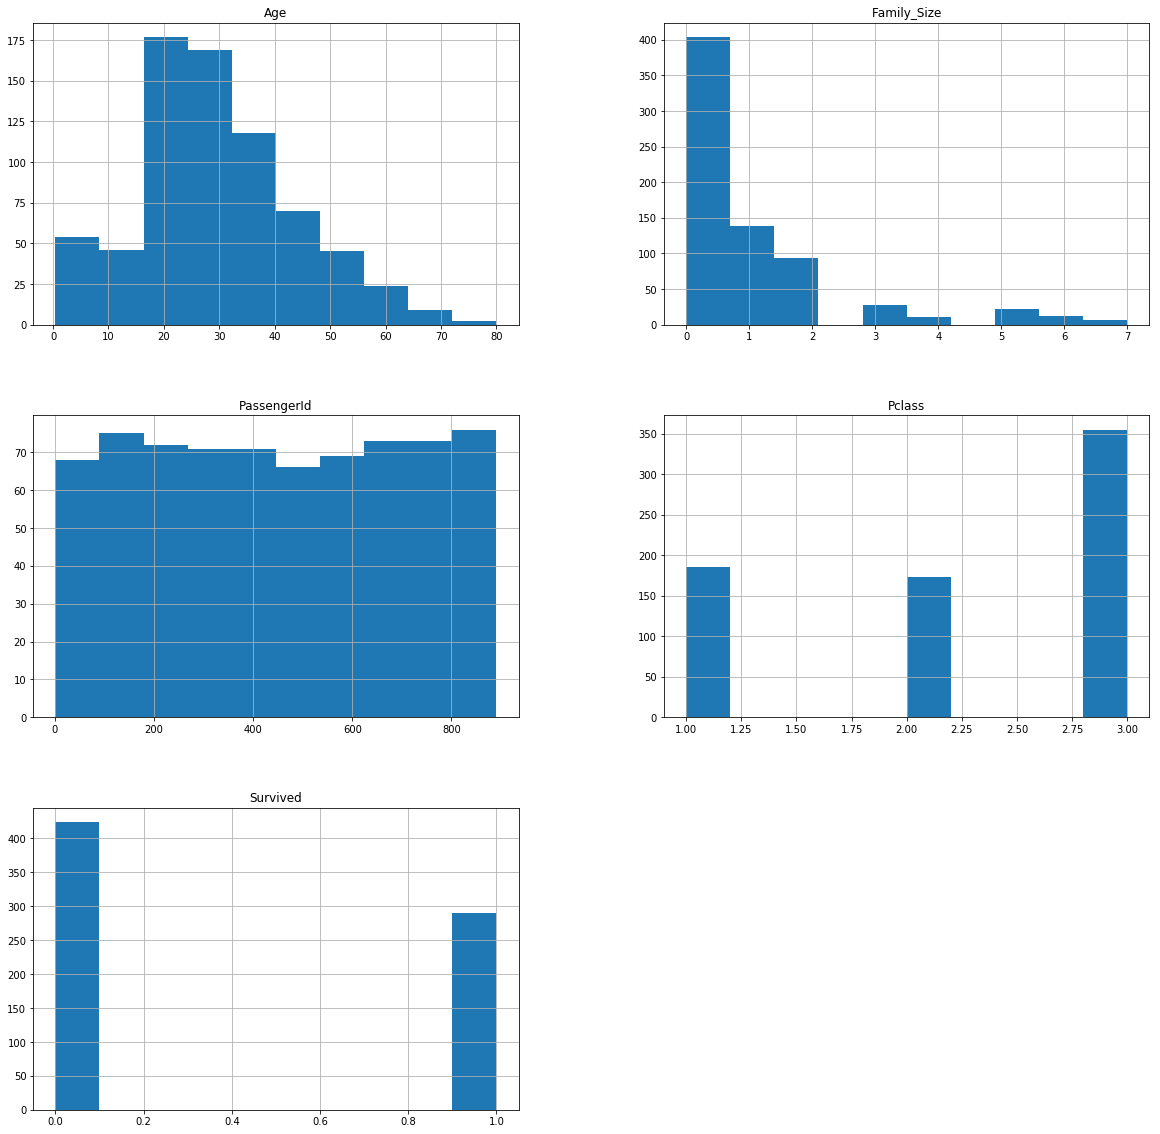

In [17]:
df_titanic.hist(figsize=[20, 20]);

In [18]:
df_titanic.groupby('Survived').mean()

,PassengerId,Pclass,Age,Family_Size
Survived,,,,
0,442.299528,2.485849,30.626179,0.891509
1,457.768966,1.872414,28.343690,1.020690


Quadro 1 - Apresenta a media da idade e Tamanho da Familia entre o grupo de sobreviventes<br>

In [19]:
df_titanic.groupby(['Survived', 'Sex']).mean()

PassengerId    Pclass        Age  Family_Size
Survived Sex                                                  
0        female   424.203125  2.812500  25.046875     2.046875
         male     445.516667  2.427778  31.618056     0.686111
1        female   445.395939  1.822335  28.847716     1.121827
         male     483.978495  1.978495  27.276022     0.806452

Quadro 2 - Apresenta a media da idade e Tamanho da Familia entre o grupo de sobreviventes por sexo<br>

In [20]:
df_titanic.groupby(['Survived', 'Class_Age']).mean()

PassengerId    Pclass        Age  Family_Size
Survived Class_Age                                               
0        adult       446.675000  2.456250  33.101562     0.550000
         child       372.083333  2.916667   5.041667     4.833333
         senior      426.526316  1.578947  65.394737     0.526316
         teenager    451.885246  2.754098  16.877049     1.245902
1        adult       460.009804  1.745098  34.095588     0.813725
         child       458.000000  2.447368   3.478158     2.263158
         senior      535.285714  1.428571  64.285714     0.571429
         teenager    433.170732  2.048780  16.634146     0.975610

Quadro 3 - Apresenta a media da idade e Tamanho da Familia entre o grupo de sobreviventes por Grupo etário<br>

In [21]:
df_survived = df.query('Survived ==1').groupby(['Sex', 'Class_Age'])
df_survived['Family_Size'].describe()

count      mean       std  min  25%  50%  75%  max
Sex    Class_Age                                                    
female adult      140.0  1.014286  1.240711  0.0  0.0  1.0  2.0  6.0
       child       19.0  2.263158  1.240166  0.0  2.0  2.0  3.0  6.0
       senior       4.0  0.500000  0.577350  0.0  0.0  0.5  1.0  1.0
       teenager    34.0  1.000000  1.279204  0.0  0.0  1.0  1.0  6.0
male   adult       64.0  0.375000  0.654654  0.0  0.0  0.0  1.0  3.0
       child       19.0  2.263158  1.045738  1.0  2.0  2.0  2.0  6.0
       senior       3.0  0.666667  1.154701  0.0  0.0  0.0  1.0  2.0
       teenager     7.0  0.857143  1.214986  0.0  0.0  0.0  1.5  3.0

Quadro 4 - Estatistica de resumo de tamanho da familia por Sexo e Grupo etário<br>

In [22]:
df.query('Survived ==1').groupby(['Sex', 'Class_Age']).count()['Name']

Sex     Class_Age
female  adult        140
        child         19
        senior         4
        teenager      34
male    adult         64
        child         19
        senior         3
        teenager       7
Name: Name, dtype: int64

Quadro 5 - Resumo de sobreviventes por sexo e Grupo etário<br>

In [23]:
df.query('Survived ==1').groupby(['Sex', 'Family_Size']).count()['Name']

Sex     Family_Size
female  0              79
        1              58
        2              35
        3              16
        4               3
        5               3
        6               3
male    0              51
        1              18
        2              18
        3               5
        6               1
Name: Name, dtype: int64

Quadro 6 - Resumo de sobreviventes por sexo e Tamanho da familia<br>

In [24]:
df.query('Survived ==1').groupby(['Class_Age','Family_Size']).count()['Name']

Class_Age  Family_Size
adult      0              108
           1               53
           2               27
           3               10
           4                2
           5                3
           6                1
child      0                1
           1                5
           2               21
           3                9
           6                2
senior     0                4
           1                2
           2                1
teenager   0               17
           1               16
           2                4
           3                2
           4                1
           6                1
Name: Name, dtype: int64

Quadro 7 - Resumo de sobreviventes por Grupo etário e Tamanho da familia<br>

**Gráficos de Barra** é uma boa escolha para demonstrar como algumas quantidades variam entre um conjunto particular de itens. Assim como o **Gráficos de Dispersão** são para visualisar relacionamentos entre pares de conjunto de dados.

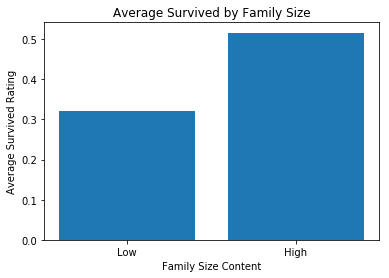

In [25]:
# Use query para selecionar cada grupo e obter sua qualidade média
mediana_family_size = df_titanic["Family_Size"].median()
low_family_size = df.query('Family_Size <= {}'.format(mediana_family_size))
high_family_size = df.query('Family_Size > {}'.format(mediana_family_size))

mean_family_size_low = low_family_size['Survived'].mean()
mean_family_size_high = high_family_size['Survived'].mean()

# Crie um gráfico de barras com rótulos adequados
locations = [1, 2]
heights = [mean_family_size_low, mean_family_size_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Survived by Family Size')
plt.xlabel('Family Size Content')
plt.ylabel('Average Survived Rating');

Grafico 1 - Sobreviventes variam conforme o tamanho da familia, ou seja, Quanto maior o tamnho da familia maior a chance de ser sobrevivente

Text(0,0.5,'Count')

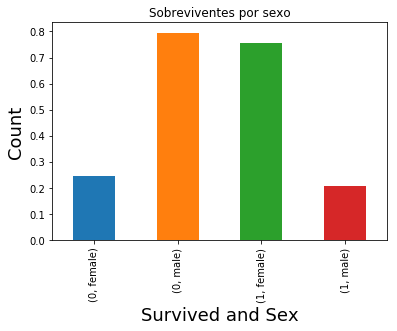

In [26]:
counts_survived_sex = df_titanic.groupby(['Survived', 'Sex']).count()['Family_Size']
totals_survived_sex = df_titanic.groupby('Sex').count()['Family_Size']
proportions_survived_sex = counts_survived_sex / totals_survived_sex

proportions_survived_sex.plot(kind='bar', title='Sobreviventes por sexo', alpha=1)
plt.xlabel('Survived and Sex', fontsize=18)
plt.ylabel('Count', fontsize=18)

Gráfico 2 - Variação de quantidade de sobreviventes por sexo. Passageiros do sexo feminimo possuem maiores chances de sobreviver<br>

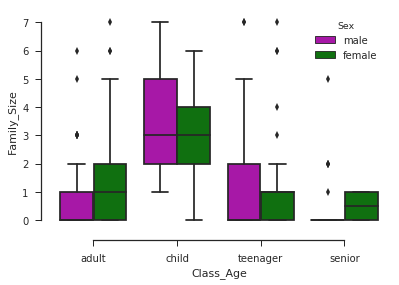

In [27]:
sns.set(style="ticks", palette="pastel")

sns.boxplot(x="Class_Age", y="Family_Size",
            hue="Sex", palette=["m", "g"],
            data=df_titanic)
sns.despine(offset=10, trim=True)

Gráfico 3 - Relação entre as variaveis dependentes **Sex** vs **Class_age** vs **Family_Size**. Entre as Crianças o sexo Masculino prevalesce em relação ao Masculino com maior tamanho de Familia. Entre os Adultos as mulheres prevalecem entre os homens com o tamanho de familia um pouco menor.<br>

Text(0,0.5,'Count')

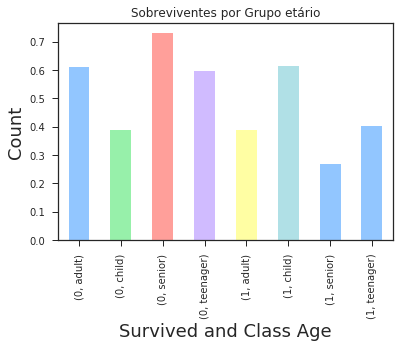

In [28]:
counts_survived_age_group = df_titanic.groupby(['Survived', 'Class_Age']).count()['Family_Size']
total_survived_age_group = df_titanic.groupby('Class_Age').count()['Family_Size']
proportions_survived_age_group = counts_survived_age_group / total_survived_age_group

proportions_survived_age_group.plot(kind='bar', title='Sobreviventes por Grupo etário', alpha=1)
plt.xlabel('Survived and Class Age', fontsize=18)
plt.ylabel('Count', fontsize=18)

Gráfico 4 - Variação de quantidade de sobreviventes por Grupo etário. O Grupo etário *Child* sobressai aos sobreviventes e *Senior* na relação inversa<br><br>

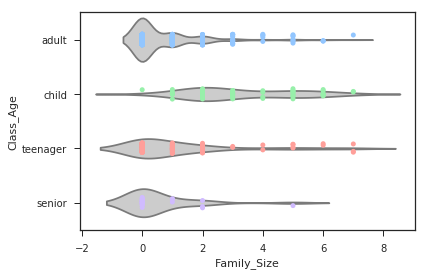

In [29]:
ax = sns.violinplot(x="Family_Size", y="Class_Age", data=df_titanic, inner=None, color=".8")
ax = sns.stripplot(x="Family_Size", y="Class_Age", data=df_titanic, jitter=True)

Grafico 5 - Observar o relacionamento da Variavel *Class_Age* e *Family_Size*. A presença de crianças está relacionado ao tamanho da familia e o grupo etário de Senior estarem viajando sozinhos provavelmente.

## Resultado

A analise dos dados populacional do Titanic, contatou-se uma predileção na evacuação da embarcação por mulheres, crianças e familias. Os idosos, homens e sem familias abordo não foram poderados com prioridade no processo de evacuação.
A idade média dos sobreviventes era de 28 anos.

## Limitações

- Os valores faltantes de idade. Optou-se por descartar os registros faltantes ao preenchimento com media já que a representatidade da informação existente era de mais de 80%.

- Pensou-se em traçar um paralelo com o Deck da Cabine do passageiro mas os valores faltantes para a fueture Cabin era excessivo, optando por descarta-lo


## Referências

- https://www.kaggle.com/c/titanic/data
- https://www.kaggle.com/c/titanic/discussion
- https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/
- https://www.encyclopedia-titanica.org/
- http://www.un.org/en/development/desa/population/publications/pdf/ageing/WPA2015_Report.pdf
- https://www.who.int/ageing/mulheres_saude.pdf
- 
